## Importing Libraris

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.naive_bayes import GaussianNB

## Data Extraction

In [1]:
TRAIN_PATH = r'../..Datasets/train.csv'
TEST_PATH = r'../../Datasets/test.csv'
SAMPLE_SUBMISSION_PATH = r"../../Datasets/sample_submission.csv"

In [62]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
train_df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


## EDA

### Checking information of the datasets

In [44]:
print(train_df.shape)
print(test_df.shape)

(26570, 26)
(20775, 25)


In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [46]:
display(train_df.head())
display(test_df.head())

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


### Feature Groupping

In [47]:
# Mengelompokkan beberapa feature
measurement_cols = [i for i in train_df.columns if "measurement" in i]
measurement_int_cols = [i for i in measurement_cols if train_df[i].dtype == np.int64]
measurement_float_cols = [i for i in train_df.columns if train_df[i].dtype == float]
float_cols = [i for i in train_df.columns if train_df[i].dtype == float]
attribute_cols = [i for i in train_df.columns if "attribute" in i]

### Missing Data

<Axes: xlabel='missing values', ylabel='column'>

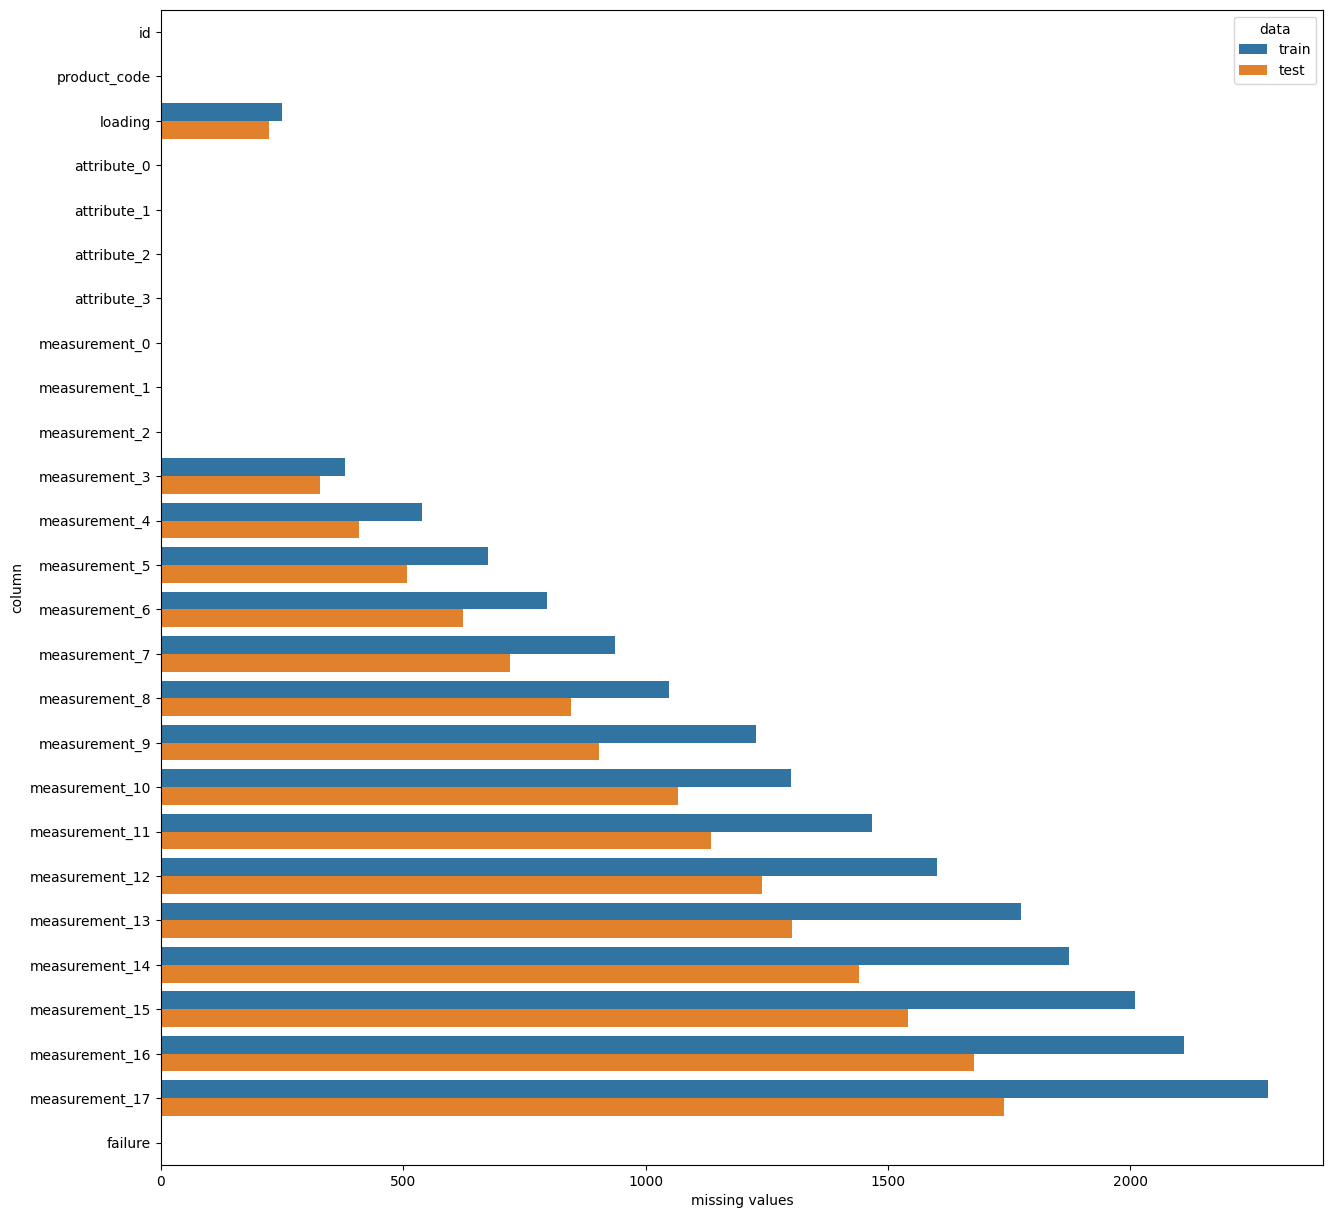

In [48]:
missing_values = pd.concat([train_df.isna().sum().rename("train"), test_df.isna().sum().rename("test")], axis=1)
#display(missing_values)
missing_values = pd.concat([train_df.isna().sum(), test_df.isna().sum()], axis=0).rename("missing values").reset_index().rename(columns={"index":"column"})
missing_values["data"] = ["train"]*len(train_df.columns) + ["test"]*len(test_df.columns)
f,ax = plt.subplots(figsize=(15,15))
sns.barplot(data = missing_values, y="column", x="missing values", hue="data", orient="h")

- Observasi:

1. Semua feature dengan value float mempunyai missing values

2. Train set dan test set mempunyai persentase yang sama dalam missing value

### Target - Failure of the product

In [49]:
value_count = train_df["failure"].value_counts()
value_count

failure
0    20921
1     5649
Name: count, dtype: int64

- Observasi
1. Persebaran kelas pada target(failure) tidak seimbang dimana kelas failure jauh lebih jarang terjadi dibandingkan dengan non failure.

### Categorical columns

#### Product code

In [50]:
value_count_product_code = train_df["product_code"].value_counts()
value_count_product_code

product_code
C    5765
E    5343
B    5250
D    5112
A    5100
Name: count, dtype: int64

In [51]:
value_count_product_code_test = test_df["product_code"].value_counts()
value_count_product_code_test

product_code
F    5422
I    5228
G    5107
H    5018
Name: count, dtype: int64

- Observasi
1. Product code dalam train set berbeda dengan test set
2. Jumlah kemunculan setiap product code kurang lebih sama 

#### Atribute 0

In [52]:
value_count_attribute0 = train_df["attribute_0"].value_counts()
value_count_attribute0

attribute_0
material_7    21320
material_5     5250
Name: count, dtype: int64

In [53]:
value_count_attribute0_test = test_df["attribute_0"].value_counts()
value_count_attribute0_test

attribute_0
material_5    10529
material_7    10246
Name: count, dtype: int64

- Observasi
1. attribute_0 mempunyai distribusi nilai yang berbeda dalam train dan test

#### Atribute 1

In [54]:
value_count_attribute1 = train_df["attribute_1"].value_counts()
value_count_attribute1

attribute_1
material_8    10865
material_5    10362
material_6     5343
Name: count, dtype: int64

In [55]:
value_count_attribute2 = train_df["attribute_2"].value_counts()
value_count_attribute2

attribute_2
6    10455
5     5765
8     5250
9     5100
Name: count, dtype: int64

- Observasi
1. Distribusinya berbeda pada train dan test

In [56]:
value_count_attribute3 = train_df["attribute_3"].value_counts()
value_count_attribute3

attribute_3
8    11015
9     5343
6     5112
5     5100
Name: count, dtype: int64

In [57]:
value_count_attribute3_test = test_df["attribute_3"].value_counts()
value_count_attribute3_test

attribute_3
4    5422
5    5228
7    5107
9    5018
Name: count, dtype: int64

- Observasi
1. Distribusinya berbeda pada train dan test

### Product code and attribute values

In [58]:
pd.concat([train_df,test_df]).groupby(["product_code"])[["attribute_0", "attribute_1", "attribute_2", "attribute_3"]].nunique()

,attribute_0,attribute_1,attribute_2,attribute_3
product_code,,,,
A,1,1,1,1
B,1,1,1,1
C,1,1,1,1
D,1,1,1,1
E,1,1,1,1
F,1,1,1,1
G,1,1,1,1
H,1,1,1,1
I,1,1,1,1


In [59]:
pd.concat([train_df,test_df]).groupby(["product_code"])[["attribute_0", "attribute_1", "attribute_2", "attribute_3"]].first()

,attribute_0,attribute_1,attribute_2,attribute_3
product_code,,,,
A,material_7,material_8,9,5
B,material_5,material_5,8,8
C,material_7,material_8,5,8
D,material_7,material_5,6,6
E,material_7,material_6,6,9
F,material_5,material_6,6,4
G,material_5,material_6,9,7
H,material_7,material_7,7,9
I,material_7,material_5,9,5


### Distribution of float value

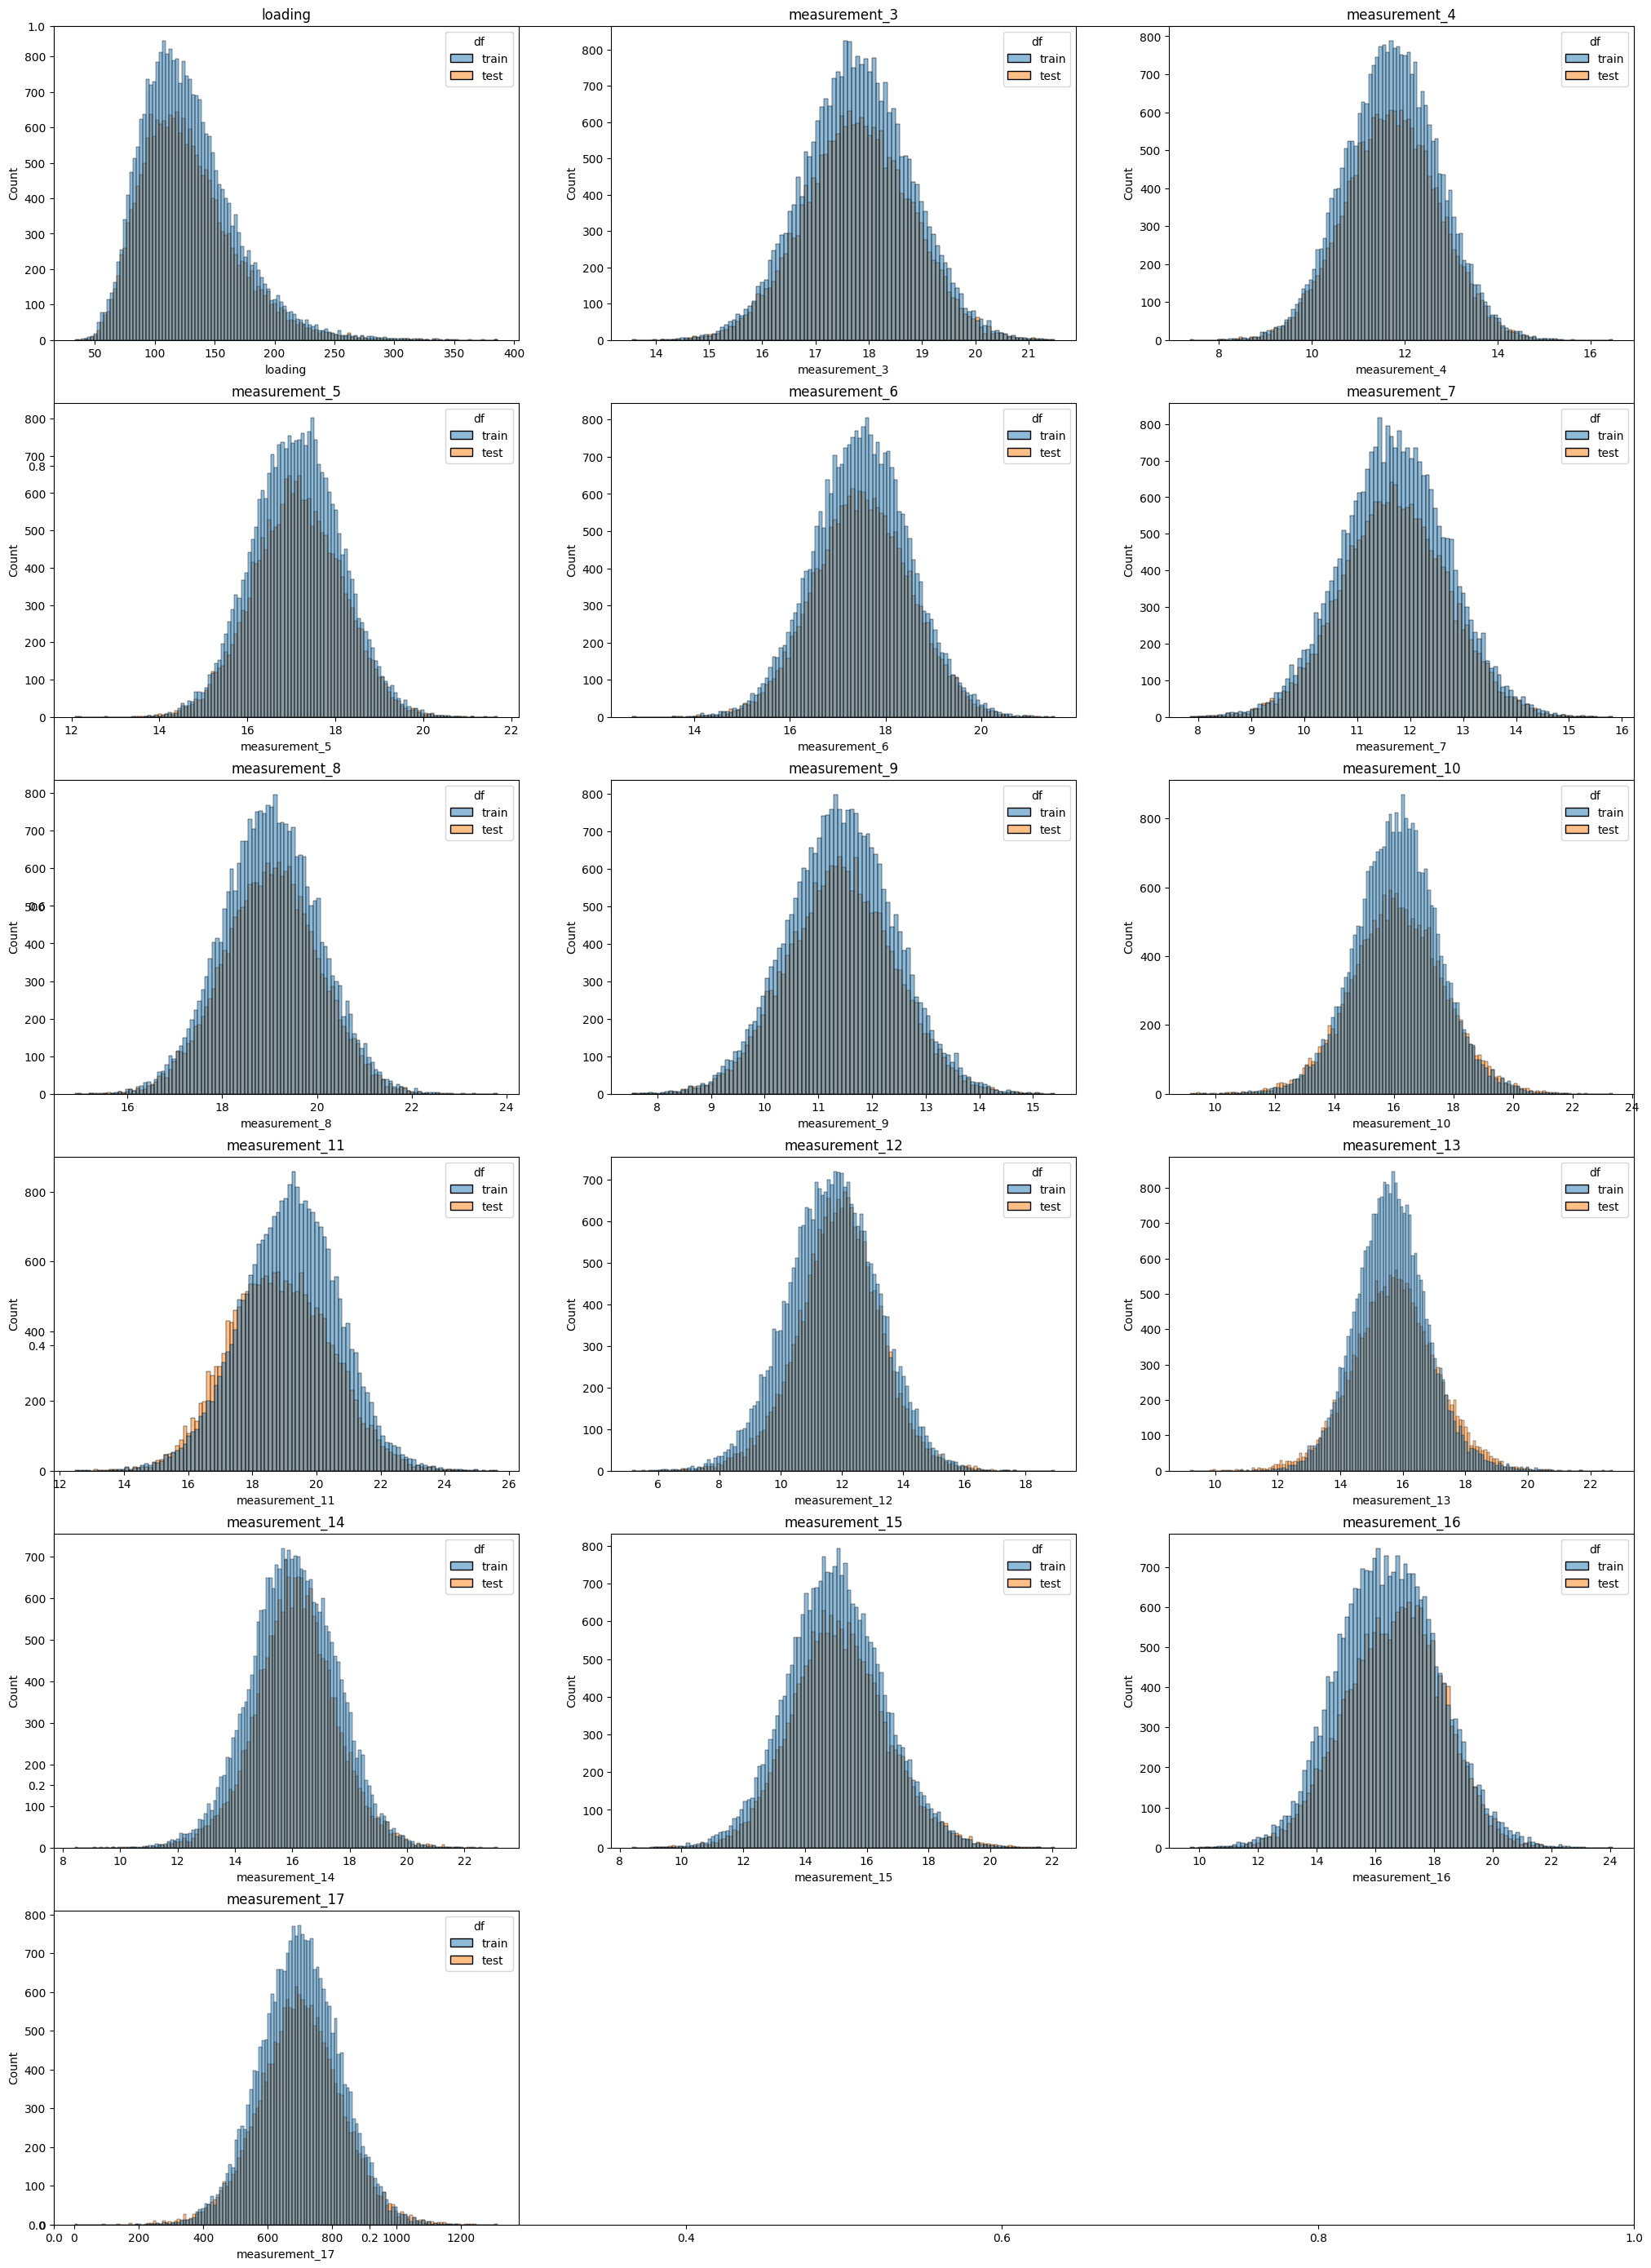

In [60]:
plt.subplots(figsize=(25,35))
train_df["df"] = "train"
test_df["df"] = "test"
for i, column in enumerate(float_cols):
    plt.subplot(6,3,i+1)
    sns.histplot(data=pd.concat([train_df, test_df]).reset_index(drop=True), x=column,hue="df")
    plt.title(column)

- Observasi 
1. Semua feature measurement float terdistribusi dengan normal
2. Feature loading mempunyai distribusi skewed

### Distribution of integer value

In [61]:
plt.subplots(figsize=(25,30))
for i, column in enumerate(measurement_int_cols):
    val_count = pd.concat([train_df, test_df])[[column,"df"]].value_counts().rename("value_counts").reset_index()
    plt.subplot(5,3,i+1)
    ax = sns.barplot(data = val_count, x=column, y="value_counts", hue="df")
    ax.set_xlabel(None)
    plt.title(column)

Error in callback <function flush_figures at 0x14f088400> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

- Observasi 
1. Distribusi pada train set dan test set untuk ketiga feature berbeda

### Correlations

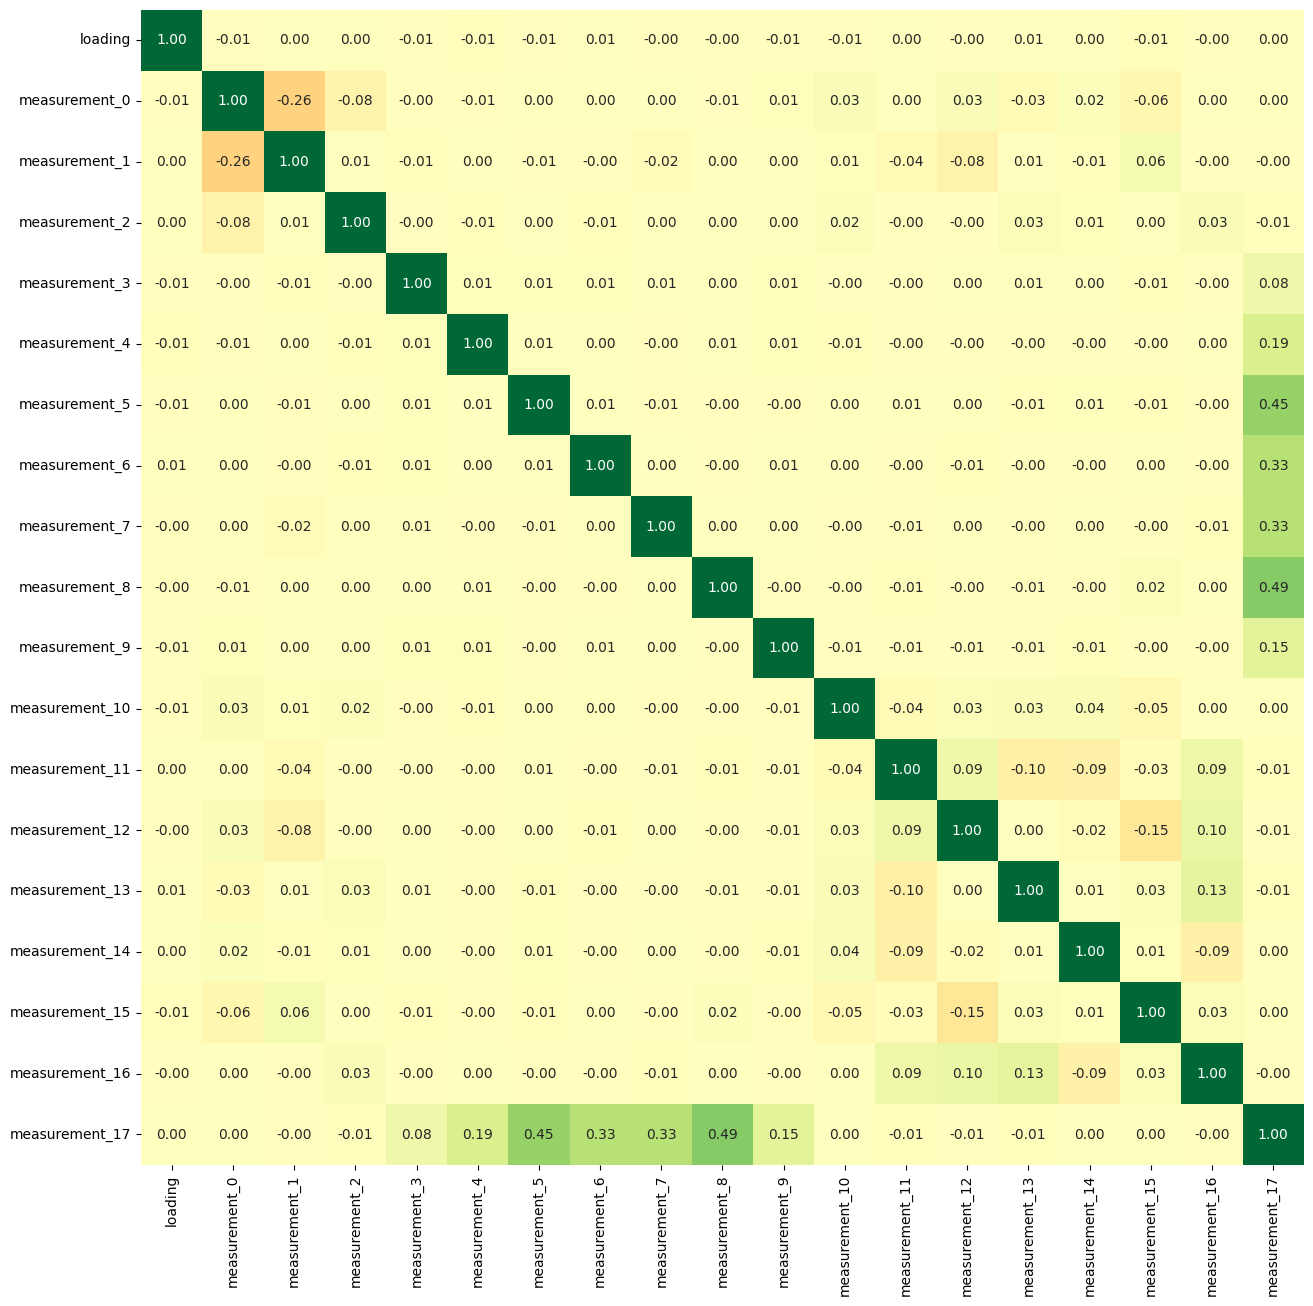

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(train_df[["loading"] + measurement_cols].corr(),annot=True, cmap="RdYlGn", fmt = '0.2f', vmin=-1, vmax=1, cbar=False);

- Observasi
1. Terdapat beberapa korelasi di antara feature measurement, khususnya measurement 17.

## Data Preparation

#### Dropping id, df, and failure columns

In [ ]:
train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

In [ ]:
train_df = train_df.drop(columns=["df"])
test_df = test_df.drop(columns=["df"])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 

In [ ]:
X = train_df.drop(columns="failure")
y = train_df["failure"]

X_test = test_df

## Feature Scaling

In [ ]:
def _scale(train_data, val_data):
    scaler = PowerTransformer()
    
    scaled_train = scaler.fit_transform(train_data[measurement_cols + ["loading"]])
    scaled_val = scaler.transform(val_data[measurement_cols + ["loading"]])
    
    #back to dataframe
    new_train = train_data.copy()
    new_val = val_data.copy()
    
    new_train[measurement_cols + ["loading"]] = scaled_train
    new_val[measurement_cols + ["loading"]] = scaled_val
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [ ]:
def _impute(train_data, val_data):
    imputer = SimpleImputer(strategy="mean")
    imputer.fit(train_data[measurement_cols + ["loading"]])
    
    filled_train = imputer.transform(train_data[measurement_cols + ["loading"]])
    filled_val = imputer.transform(val_data[measurement_cols + ["loading"]])
    
    #back to dataframe
    new_train = train_data.copy()
    new_val = val_data.copy()
    
    new_train[measurement_cols + ["loading"]] = filled_train
    new_val[measurement_cols + ["loading"]] = filled_val
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [ ]:
def _ohe(train_data, val_data):    
    new_train = pd.get_dummies(train_data, columns=["product_code","attribute_0", "attribute_1", "attribute_2", "attribute_3"])
    new_val = pd.get_dummies(val_data, columns=["product_code","attribute_0", "attribute_1", "attribute_2", "attribute_3"])
    
    #columns are not currently the same, concat so that they are
    train_val = pd.concat([new_train, new_val]).fillna(0) #creates some empty columns, fill these with 0's
    
    #extract train and val again
    new_train = train_val.iloc[0:len(train_data)]
    new_val = train_val.iloc[len(train_data):]
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [ ]:
def k_fold_cv(model,X,y):
    kfold = GroupKFold(n_splits=5)

    feature_imp, y_pred_list, y_true_list, roc_list  = [],[],[],[]
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y, train_df["product_code"])):
        print("===== fold", fold, "=====")
        X_train = X.loc[train_index]
        X_val = X.loc[val_index]

        y_train = y.loc[train_index]
        y_val = y.loc[val_index]
            
        #impute
        X_train, X_val = _impute(X_train, X_val)
            
        #scale the data
        X_train, X_val = _scale(X_train, X_val)
            
        #encode categorical variables
        X_train, X_val = _ohe(X_train, X_val)
            
        # fit the model
        model.fit(X_train,y_train)
            
        #make predictions
        y_pred = model.predict_proba(X_val)[:,1]
            
        #save predictions for later
        y_pred_list = np.append(y_pred_list, y_pred)
        y_true_list = np.append(y_true_list, y_val)
        
        #evaluate performance
        roc_list.append(roc_auc_score(y_val,y_pred))
        print("roc auc", roc_auc_score(y_val,y_pred))
            
        #feature imporance
        try:
            feature_imp.append(model.feature_importances_)
        except AttributeError: # if model does not have .feature_importances_ attribute
            pass # returns empty list
    return feature_imp, y_pred_list, y_true_list, roc_list, X_val, y_val

In [ ]:
model = GaussianNB()

In [ ]:
%%time
feature_imp, y_pred_list, y_true_list, roc_list, X_val, y_val = k_fold_cv(model=model,X=X,y=y)

===== fold 0 =====
roc auc 0.580254738588613
===== fold 1 =====
roc auc 0.5778840158237452
===== fold 2 =====
roc auc 0.590481593625065
===== fold 3 =====
roc auc 0.5887410071942446
===== fold 4 =====
roc auc 0.586055557611088
CPU times: user 856 ms, sys: 112 ms, total: 968 ms
Wall time: 998 ms


In [ ]:
print("Mean ROC AUC Score:", np.mean(roc_list))

Mean ROC AUC Score: 0.5846833825685511


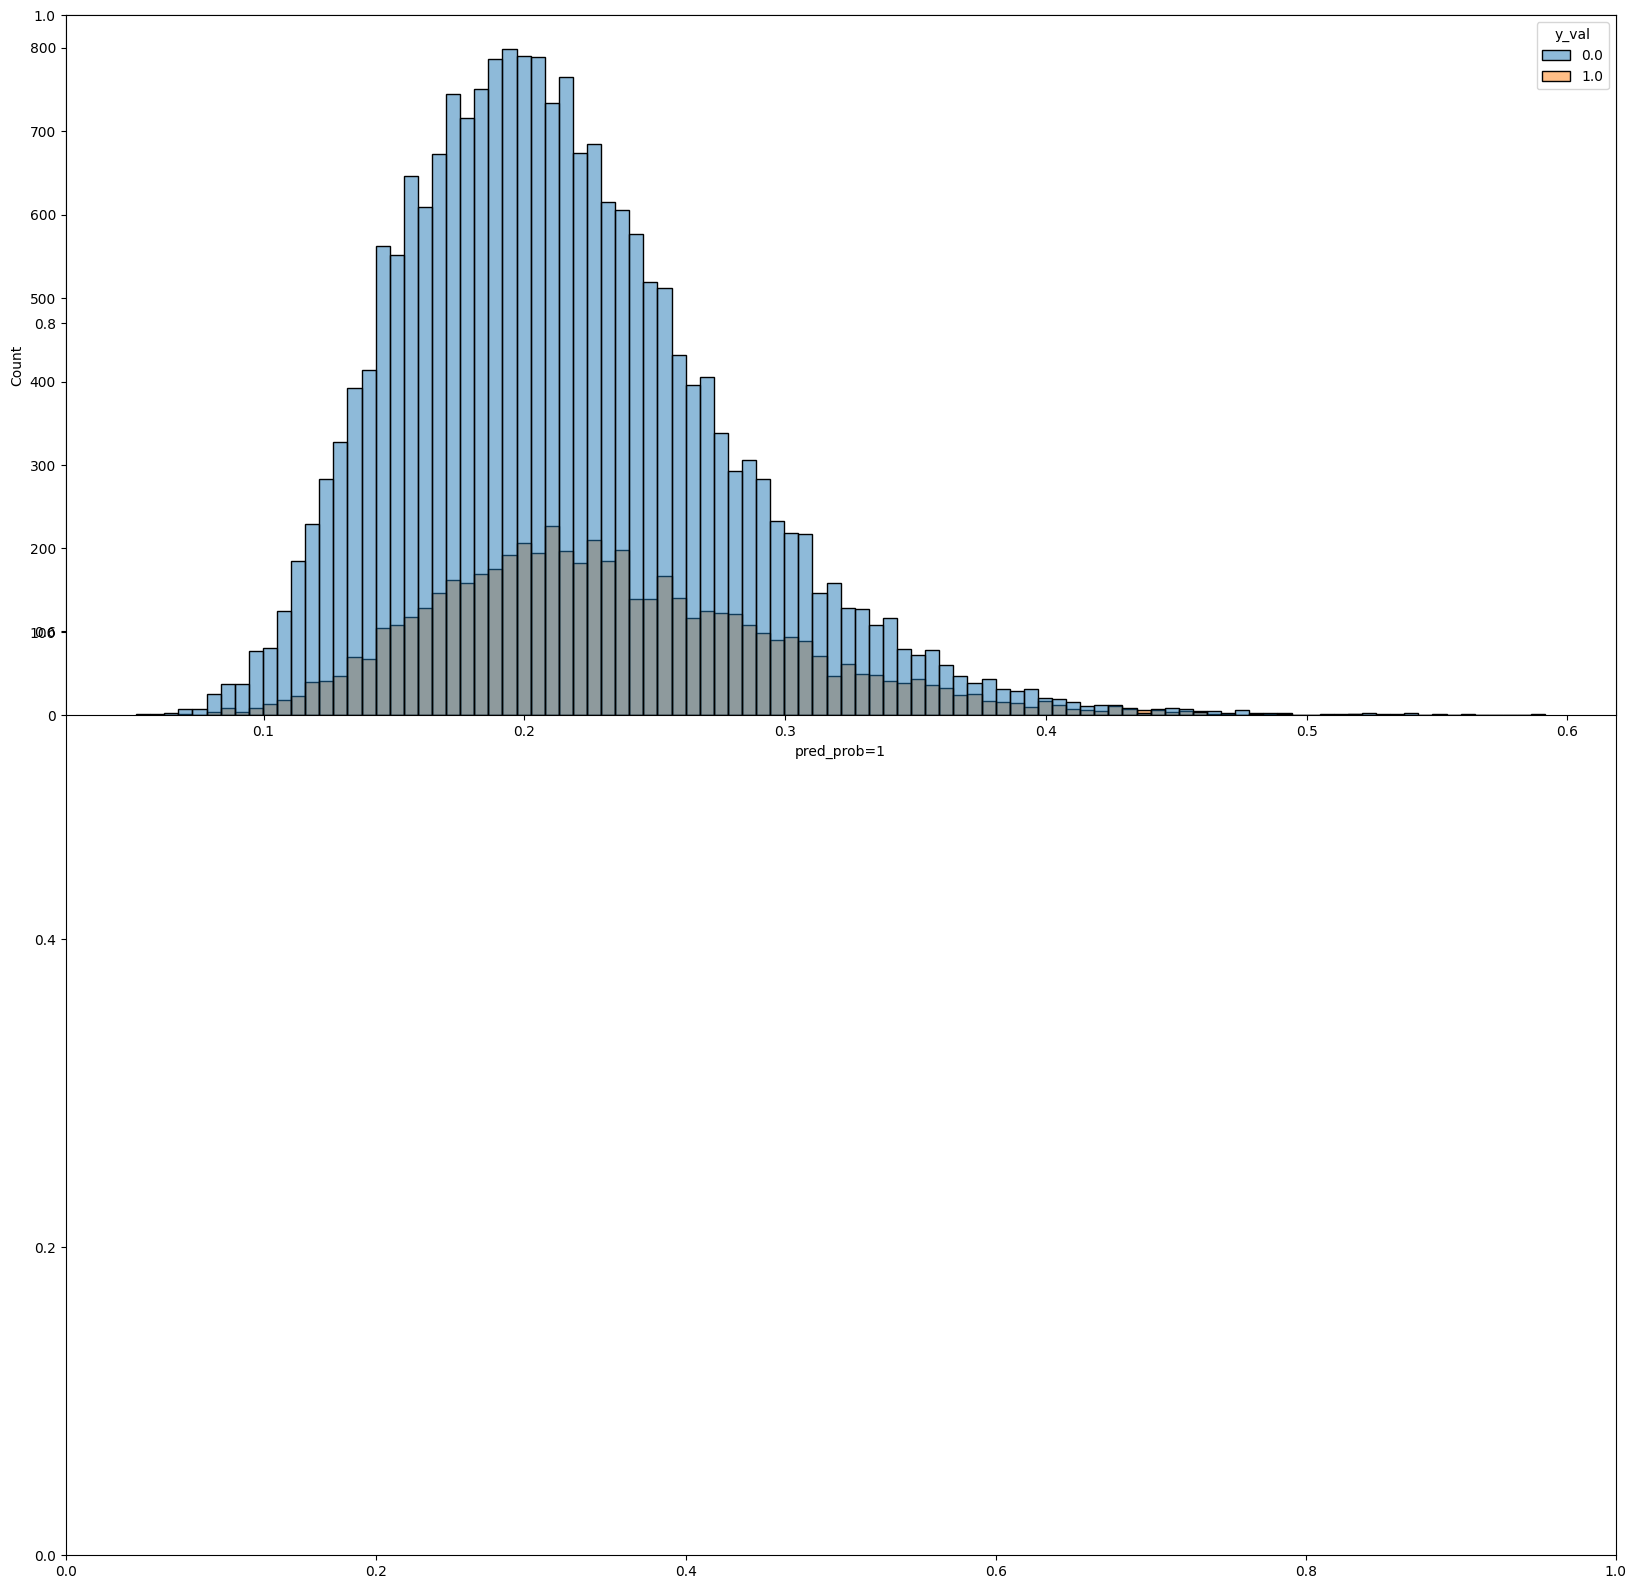

In [ ]:
val_preds = pd.DataFrame({"pred_prob=1":y_pred_list, "y_val":y_true_list})
f,ax = plt.subplots(figsize=(20,20))
plt.subplot(2,1,1)
ax = sns.histplot(data=val_preds, x="pred_prob=1", hue="y_val", bins = 100)

## Inference

In [ ]:
def inference(X, X_test, iterations):
    pred_list = []
    for i in range(iterations):
        X_train = X.sample(int(0.8*len(X)))
        y_train = y.loc[X_train.index]

        X_train, X_te = _impute(X_train, X_test)

        #scale the data
        X_train, X_te = _scale(X_train, X_te)

        #encode categorical variables
        X_train, X_te = _ohe(X_train, X_te)
        
        model = GaussianNB()
        # fit the model
        model.fit(X_train,y_train)

        #make predictions
        y_pred = model.predict_proba(X_te)[:,1]
        
        pred_list.append(y_pred)
    
    pred_df = pd.DataFrame(pred_list).T
    pred_df = pred_df.rank()
    pred_df["mean"] = pred_df.mean(axis=1)
    
    return pred_df

In [ ]:
%%time
predictions_df = inference(X, X_test, 500)

CPU times: user 1min 51s, sys: 5.7 s, total: 1min 56s
Wall time: 1min 58s


In [ ]:
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,mean
0,5193.0,6410.0,5132.0,4952.0,4706.0,5352.0,6146.0,4979.0,5796.0,5146.0,...,5317.0,5824.0,4496.0,4934.0,5875.0,4387.0,6221.0,5692.0,7368.0,5396.701
1,1573.0,1526.0,1211.0,1145.0,1255.0,1270.0,2089.0,1044.0,1447.0,1866.0,...,2652.0,1529.0,1075.0,1895.0,2186.0,1428.0,2178.0,1840.0,2415.0,1702.142
2,2580.0,2686.0,2741.0,2508.0,2155.0,2953.0,3389.0,2329.0,2926.0,2165.0,...,2678.0,3242.0,2123.0,2016.0,3238.0,2213.0,2375.0,2440.0,3143.0,2526.668
3,2031.0,3226.0,2990.0,2882.0,2313.0,2262.0,3262.0,2790.0,2638.0,2142.0,...,3192.0,2752.0,1994.0,2068.0,2211.0,2221.0,2421.0,2520.0,1810.0,2344.251
4,14112.0,15012.0,14039.0,13824.0,15173.0,13957.0,16027.0,14086.0,14908.0,14854.0,...,16746.0,15039.0,13820.0,14173.0,15303.0,14995.0,15776.0,14532.0,17189.0,14816.257


In [ ]:
pred_df = pd.DataFrame(y_pred_list, columns=["pred_prob"])
pred_df["rank"] = pred_df.rank()
display(pred_df.head(10))

print("roc auc using prediction probabilities:", roc_auc_score(y_true_list, pred_df["pred_prob"]))
print("roc auc using predicted probabilities ranks:", roc_auc_score(y_true_list, pred_df["rank"]))

,pred_prob,rank
0,0.189456,9518.0
1,0.236468,17575.0
2,0.210515,13340.0
3,0.255660,20095.0
4,0.402960,26337.0
5,0.207052,12717.0
6,0.204486,12260.0
7,0.228707,16384.0
8,0.211972,13615.0
9,0.225947,15937.0


roc auc using prediction probabilities: 0.5824259566725692
roc auc using predicted probabilities ranks: 0.5824259566725692


## Submission

In [ ]:
sub_df = pd.read_csv(SAMPLE_SUBMISSION_PATH)
sub_df["failure"] = predictions_df["mean"]
sub_df.to_csv('../submissions/submission_7.csv', index=False)